# **PROBLEM STATEMENT: Air quality analysis using python (seaborn + pandas): Analyze Indian Air Quality Index (AQI) Data To Identify The Most Polluted Cities, Monthly Variation, And Pollutant Composition.**

# **OBJECTIVES**

## 1.	Most Polluted Cities in India.
##2.	Analyse AQI Monthly Variation in top polluted cities.
##3.	Analyse AQI Yearly Variation in top polluted cities.
##4.	Contribution Of Each Pollutant To Overall Pollution.
##5.	Pollutants Composition in top polluted cities.
##6.	Correlation heatmap between pollutants.
##7.	Identify most polluted station in particular city.
##8.	Statewise AQI trend visualization.




# **IMPORT LIBRARIES AND DATA**

In [430]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [431]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [432]:
df=pd.read_csv("/content/drive/MyDrive/TinkerStream/city_day.csv")

# **DATA CLEANING AND PREPROCESSING**

In [433]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [434]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [436]:
#Changing the data type of Date column (from object to datetime)
df['Date'] = pd.to_datetime(df['Date'])


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [438]:
df.shape

(29531, 16)

In [439]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


# **AQI CALUCULATION MEASURE USES POLLUTANTS :-PM2.5, PM10, SO2, NOx, NH3, CO and O3**


In [440]:
#Removing pollutants(NO,NO2,Benzene,Toluene,Xylene)
df= df.drop(columns=['NO','NO2','Benzene','Toluene','Xylene'])

In [441]:
missing_percentage = df.isnull().mean() * 100

In [442]:
missing_percentage

,0
City,0.000000
Date,0.000000
PM2.5,15.570079
PM10,37.723071
NOx,14.171549
NH3,34.973418
CO,6.972334
SO2,13.050692
O3,13.619586
AQI,15.851139


In [443]:
#HANDLING NULL VALUES BY USING AVG
columns_to_fill = ['PM2.5','PM10', 'NOx','NH3','CO','SO2','O3']
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())

In [444]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
AQI,4681


In [445]:
#Fill missing AQI values using city-wise average
df['AQI'] = df['AQI'].fillna(df.groupby('City')['AQI'].transform('mean'))



In [446]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
AQI,0


In [447]:
def get_aqi_bucket(AQI):
    if AQI <= 50:
        return 'Good'
    elif AQI <= 100:
        return 'Satisfactory'
    elif AQI <= 200:
        return 'Moderate'
    elif AQI <= 300:
        return 'Poor'
    elif AQI <= 400:
        return 'Very Poor'
    else:
        return 'Severe'



In [448]:
df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI'].apply(get_aqi_bucket))


In [449]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
AQI,0


# **OBJECTIVE 1:- MOST POLLUTED CITIES**

In [450]:
#CALCUATING UNIQUE CITIES
unique_cities = df['City'].unique()

In [451]:
print("Total unique cities:", df['City'].nunique())

Total unique cities: 26


In [452]:
unique_cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [453]:
# Grouping data by City and calculate the average AQI
most_polluted = df.groupby('City')['AQI'].mean().reset_index()

In [454]:
# Sort cities by descending AQI
most_polluted = most_polluted.sort_values(by='AQI', ascending=False)

In [455]:

# Top 10 most polluted cities
print("Top 10 most polluted cities (based on average AQI):")
print(most_polluted.head(10))


Top 10 most polluted cities (based on average AQI):
            City         AQI
0      Ahmedabad  452.122939
10         Delhi  259.487744
21         Patna  240.782042
12      Gurugram  225.123882
19       Lucknow  217.973059
23       Talcher  172.886819
16    Jorapokhar  159.251621
6   Brajrajnagar  150.280505
18       Kolkata  140.566313
13      Guwahati  140.111111


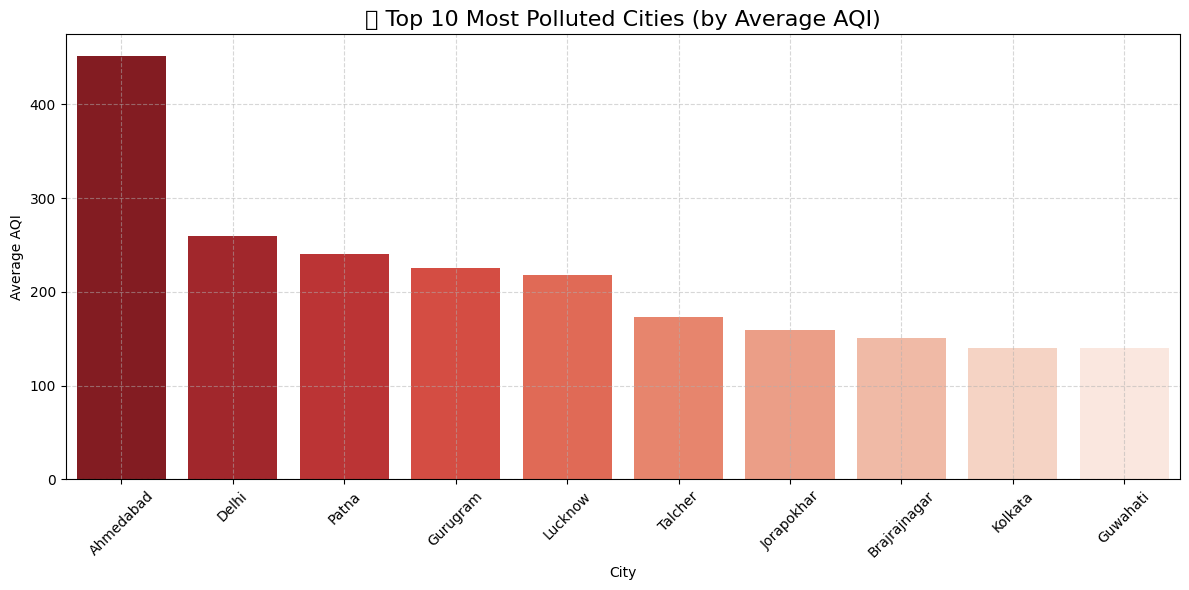

In [456]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by city and calculate average AQI
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=city_aqi, x='City', y='AQI', palette='Reds_r')
plt.title('🏙️ Top 10 Most Polluted Cities (by Average AQI)', fontsize=16)
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [457]:
top_10

,City,AQI
0,Ahmedabad,452.122939
10,Delhi,259.487744
21,Patna,240.782042
12,Gurugram,225.123882
19,Lucknow,217.973059
23,Talcher,172.886819
16,Jorapokhar,159.251621
6,Brajrajnagar,150.280505
18,Kolkata,140.566313
13,Guwahati,140.111111


In [458]:
top_10['City']

,City
0,Ahmedabad
10,Delhi
21,Patna
12,Gurugram
19,Lucknow
23,Talcher
16,Jorapokhar
6,Brajrajnagar
18,Kolkata
13,Guwahati


# **OBJECTIVE 2 : MONTHLY VARIATION**

# **MONTHWISE AQI TREND IN ALL CITIES**


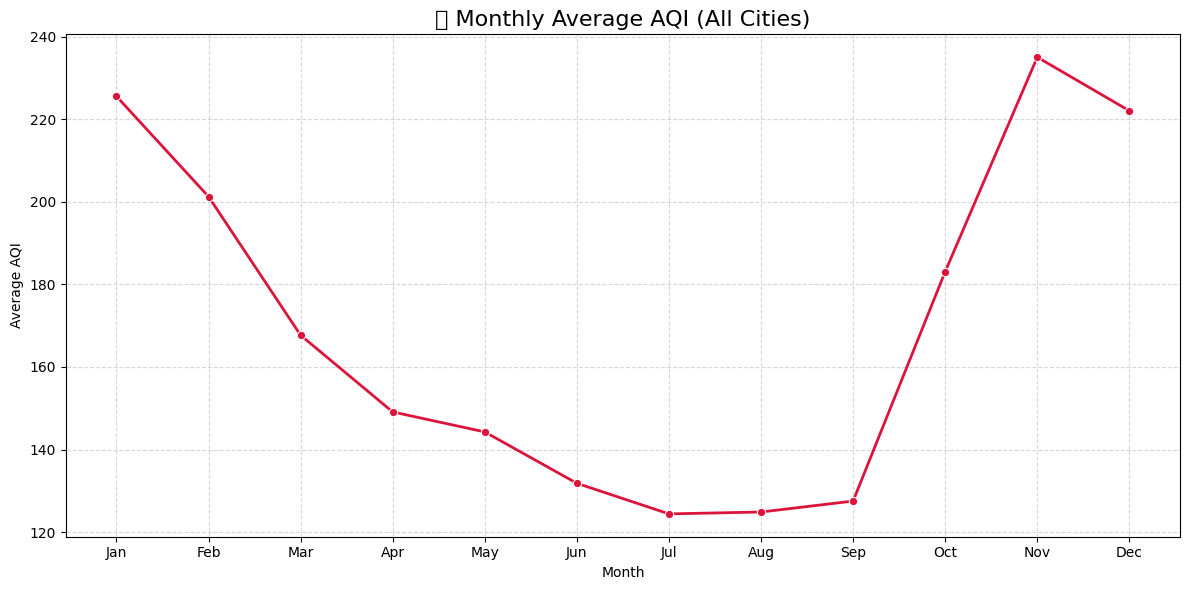

In [459]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month as number and name
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%b')

# Group by month and calculate average AQI
monthly_aqi = df.groupby('Month')[['AQI']].mean().reset_index()
monthly_aqi['Month_Name'] = monthly_aqi['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

# Sort by month number
monthly_aqi = monthly_aqi.sort_values(by='Month')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_aqi, x='Month_Name', y='AQI', marker='o', linewidth=2, color='crimson')
plt.title('📅 Monthly Average AQI (All Cities)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **MONTHLY AQI TREND IN TOP CITIES**

In [460]:
# Create a Month column
df['Month'] = df['Date'].dt.month

In [461]:
# Calculate monthly average AQI (overall or per city)
monthly_aqi = df.groupby('Month')['AQI'].mean().reset_index()

In [462]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [463]:
# Create a Month column
df = pd.read_csv("/content/drive/MyDrive/TinkerStream/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df= df.drop(columns=['NO','NO2','Benzene','Toluene','Xylene'])
columns_to_fill = ['PM2.5','PM10', 'NOx','NH3','CO','SO2','O3']
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())
df['AQI'] = df['AQI'].fillna(df.groupby('City')['AQI'].transform('mean'))
df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI'].apply(get_aqi_bucket))

df['Month'] = df['Date'].dt.month

In [464]:
top_cities = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10).index.tolist()
df_top = df[df['City'].isin(top_cities)]

In [465]:
def plot_city_avg_aqi(city):
    city_data = df_top[df_top['City'] == city]
    monthly_avg = city_data.groupby('Month')['AQI'].mean().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=monthly_avg, x='AQI', y='Month', marker='o')
    plt.title(f'Average Monthly AQI for {city}')
    plt.xlabel('Average AQI')
    plt.ylabel('Month')
    plt.yticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()

interact(plot_city_avg_aqi, city=top_cities)


interactive(children=(Dropdown(description='city', options=('Ahmedabad', 'Delhi', 'Patna', 'Gurugram', 'Luckno…

<function __main__.plot_city_avg_aqi(city)>

# **OBJECTIVE 3: YEARLY AQI TREND IN ALL CITIES**

In [466]:
import pandas as pd
import plotly.graph_objects as go

# Load your combined data

combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')
combined_df['Year'] = combined_df['Date'].dt.year
combined_df = combined_df.dropna(subset=['State', 'AQI'])

# Group data
grouped = combined_df.groupby(['State', 'Year'])['AQI'].mean().reset_index()

# Unique states
states = grouped['State'].unique()

# Plotly figure
fig = go.Figure()
buttons = []

# Create one line per state
for i, state in enumerate(states):
    state_data = grouped[grouped['State'] == state]

    fig.add_trace(go.Scatter(
        x=state_data['Year'],
        y=state_data['AQI'],
        mode='lines+markers',
        name=state,
        visible=(i == 0)  # Only first visible
    ))

    # Create a button for each state
    buttons.append(dict(
        label=state,
        method='update',
        args=[
            {"visible": [j == i for j in range(len(states))]},
            {"title": f"📈 Year-wise AQI Trend in {state}"}
        ]
    ))

# Update layout with dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top",
            showactive=True
        )
    ],
    title=f"📈 Year-wise AQI Trend in {states[0]}",
    xaxis_title="Year",
    yaxis_title="Average AQI",
    template="plotly_white",
    height=500
)

fig.show()


# **OBJECTIVE 4: POLLUTANTS COMPOSITION**

# **CONTRIBUTION OF EACH POLLUTANT TO OVERALL POLLUTION**

In [467]:
import pandas as pd
import plotly.express as px


# Select key pollutants
pollutants = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

# Calculate total (sum) or average value of each pollutant
pollutant_totals = df[pollutants].sum()

# Normalize to get % contribution
pollutant_percent = 100 * (pollutant_totals / pollutant_totals.sum())

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Pollutant': pollutant_percent.index,
    'Contribution (%)': pollutant_percent.values
}).sort_values(by='Contribution (%)', ascending=False)

# Plot using Plotly Express
fig = px.bar(
    plot_df,
    x='Pollutant',
    y='Contribution (%)',
    title='📊 Percentage Contribution of Each Pollutant to Overall Pollution',
    text='Contribution (%)',
    color='Pollutant',
    template='plotly_dark'
)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(yaxis_title='Percentage (%)', xaxis_title='Pollutant', height=500)

fig.show()

# **OBJECTIVE 5: POLLUTANT COMPOSITION IN TOP POLLUTED CITIES**

In [468]:
pollutants = ['PM2.5', 'PM10', 'NOx', 'CO', 'SO2', 'O3', 'NH3']

In [469]:
# pie chart function
def show_pollutant_composition(city):
    city_data = df[df['City'] == city]
    pollutant_means = city_data[pollutants].mean()

    plt.figure(figsize=(7, 7))
    plt.pie(pollutant_means, labels=pollutants, autopct='%1.1f%%', startangle=140)
    plt.title(f'Average Pollutant Composition in {city}')
    plt.axis('equal')
    plt.show()

# Run interactive dropdown
interact(show_pollutant_composition, city=top_cities)


interactive(children=(Dropdown(description='city', options=('Ahmedabad', 'Delhi', 'Patna', 'Gurugram', 'Luckno…

<function __main__.show_pollutant_composition(city)>

In [470]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Set Plotly to work in Colab
pio.renderers.default = 'colab'


# Ensure correct types
df['City'] = df['City'].astype(str)
pollutants = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

# Get unique cities
cities = sorted(df['City'].unique())

# Initialize figure and buttons
fig = go.Figure()
buttons = []

# Create a trace for each city
for i, city in enumerate(cities):
    city_data = df[df['City'] == city]
    avg_pollutants = city_data[pollutants].mean()

    fig.add_trace(go.Bar(
        x=pollutants,
        y=avg_pollutants,
        name=city,
        visible=(i == 0)  # Show only first city
    ))

    buttons.append(dict(
        label=city,
        method='update',
        args=[
            {'visible': [j == i for j in range(len(cities))]},
            {'title': f'Average Pollutant Levels in {city}'}
        ]
    ))

# Add dropdown to layout
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    title=f'Average Pollutant Levels in {cities[0]}',
    xaxis_title='Pollutant',
    yaxis_title='Average Concentration (µg/m³ or mg/m³)',
    template='plotly_dark',
    height=500
)

fig.show()


# **OBJECTIVE 6: CORRELATION HEATMAP BETWEEN POLLUTANTS**

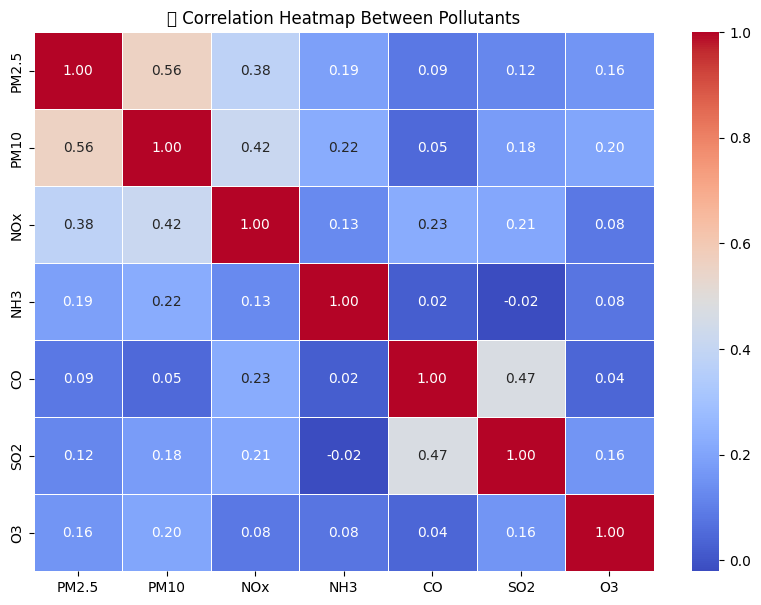

In [471]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# List of pollutants
pollutants = ['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

# Calculate correlation
corr_matrix = df[pollutants].corr()

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔗 Correlation Heatmap Between Pollutants')
plt.show()


# **DATA CLEANIG AND PREPROCESSING (station_day.csv)**

In [472]:
station_day=pd.read_csv('/content/drive/MyDrive/TinkerStream/station_day.csv')

In [473]:
station_day

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [474]:
station_day.shape

(108035, 16)

In [475]:
station_day.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [476]:
station_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [477]:
#Changing the data type of Date column (from object to datetime)
station_day['Date'] = pd.to_datetime(station_day['Date'])


In [478]:
station_day.isnull().sum()

,0
StationId,0
Date,0
PM2.5,21625
PM10,42706
NO,17106
NO2,16547
NOx,15500
NH3,48105
CO,12998
SO2,25204


In [479]:
station_day.isnull().mean()*100

,0
StationId,0.000000
Date,0.000000
PM2.5,20.016661
PM10,39.529782
NO,15.833758
NO2,15.316333
NOx,14.347202
NH3,44.527237
CO,12.031286
SO2,23.329477


In [480]:
#Removing pollutants(NO,NO2,Benzene,Toluene,Xylene)

cols_to_drop = ['NO','NO2','Benzene','Toluene','Xylene']
existing_cols = [col for col in cols_to_drop if col in station_day.columns]

station_day = station_day.drop(columns=existing_cols, axis=1)

In [481]:
station_day.head()

,StationId,Date,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,12.40,12.19,0.10,10.76,109.26,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,12.08,10.72,0.12,15.24,127.09,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,14.85,10.28,0.14,26.96,117.44,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,21.77,12.91,0.11,33.59,111.81,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,17.01,11.42,0.09,19.00,138.18,188.0,Moderate


In [482]:
station_day.isnull().mean()*100

,0
StationId,0.000000
Date,0.000000
PM2.5,20.016661
PM10,39.529782
NOx,14.347202
NH3,44.527237
CO,12.031286
SO2,23.329477
O3,23.666404
AQI,19.447401


In [483]:
#HANDLING NULL VALUES BY USING AVG
columns_to_fill = ['PM2.5','PM10', 'NOx','NH3','CO','SO2','O3']
for col in columns_to_fill:
    station_day[col] = station_day[col].fillna(station_day[col].mean())

In [484]:
station_day

,StationId,Date,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,12.400000,12.190000,0.10,10.76,109.26,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,12.080000,10.720000,0.12,15.24,127.09,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,14.850000,10.280000,0.14,26.96,117.44,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,21.770000,12.910000,0.11,33.59,111.81,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,17.010000,11.420000,0.09,19.00,138.18,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,41.195055,28.732875,0.69,4.36,30.59,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,41.195055,28.732875,0.68,3.49,38.95,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,214.200000,11.400000,0.78,5.12,38.17,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,36.690000,29.260000,0.69,5.88,29.64,57.0,Satisfactory


# **STATION.CSV**

In [485]:
station=pd.read_csv('/content/drive/MyDrive/TinkerStream/stations.csv')

In [486]:
station.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [487]:
station.drop(columns=['Status'], inplace=True)

In [488]:
station

,StationId,StationName,City,State
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh
...,...,...,...,...
225,WB010,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal
226,WB011,"Rabindra Bharati University, Kolkata - WBPCB",Kolkata,West Bengal
227,WB012,"Rabindra Sarobar, Kolkata - WBPCB",Kolkata,West Bengal
228,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal


In [489]:
station.shape

(230, 4)

In [490]:
station.columns

Index(['StationId', 'StationName', 'City', 'State'], dtype='object')

In [491]:
station.isnull().sum()

,0
StationId,0
StationName,0
City,0
State,0


###**COMBINING STATION AND STATION_DAY**

In [492]:
merged_df = pd.merge(station_day, station, on='StationId', how='left')

In [493]:
merged_df

,StationId,Date,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State
0,AP001,2017-11-24,71.36,115.75,12.400000,12.190000,0.10,10.76,109.26,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
1,AP001,2017-11-25,81.40,124.50,12.080000,10.720000,0.12,15.24,127.09,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
2,AP001,2017-11-26,78.32,129.06,14.850000,10.280000,0.14,26.96,117.44,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
3,AP001,2017-11-27,88.76,135.32,21.770000,12.910000,0.11,33.59,111.81,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
4,AP001,2017-11-28,64.18,104.09,17.010000,11.420000,0.09,19.00,138.18,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,41.195055,28.732875,0.69,4.36,30.59,50.0,Good,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal
108031,WB013,2020-06-28,11.80,18.47,41.195055,28.732875,0.68,3.49,38.95,65.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal
108032,WB013,2020-06-29,18.60,32.26,214.200000,11.400000,0.78,5.12,38.17,63.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal
108033,WB013,2020-06-30,16.07,39.30,36.690000,29.260000,0.69,5.88,29.64,57.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal


In [494]:
merged_df = merged_df.drop_duplicates()

In [495]:
merged_df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,0
PM10,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
AQI,21010


In [496]:
#Fill missing AQI values using city-wise average
merged_df['AQI'] = merged_df['AQI'].fillna(merged_df.groupby('City')['AQI'].transform('mean'))

In [497]:
def get_aqi_bucket(AQI):
    if AQI <= 50:
        return 'Good'
    elif AQI <= 100:
        return 'Satisfactory'
    elif AQI <= 200:
        return 'Moderate'
    elif AQI <= 300:
        return 'Poor'
    elif AQI <= 400:
        return 'Very Poor'
    else:
        return 'Severe'


In [498]:
merged_df['AQI_Bucket'] = merged_df['AQI_Bucket'].fillna(merged_df['AQI'].apply(get_aqi_bucket))

In [499]:
merged_df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,0
PM10,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
AQI,0


In [500]:
merged_df.head()

,StationId,Date,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State
0,AP001,2017-11-24,71.36,115.75,12.40,12.19,0.10,10.76,109.26,95.299643,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
1,AP001,2017-11-25,81.40,124.50,12.08,10.72,0.12,15.24,127.09,184.000000,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
2,AP001,2017-11-26,78.32,129.06,14.85,10.28,0.14,26.96,117.44,197.000000,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
3,AP001,2017-11-27,88.76,135.32,21.77,12.91,0.11,33.59,111.81,198.000000,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
4,AP001,2017-11-28,64.18,104.09,17.01,11.42,0.09,19.00,138.18,188.000000,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh


# **OBJECTIVE 7: STATIONWISE AQI TREND VISUALIZATION**

In [501]:
import pandas as pd
import plotly.graph_objects as go


# top 10 polluted cities by average AQI
top_cities = merged_df.groupby('City')['AQI'].mean().nlargest(10).index.tolist()

# Prepare figure and dropdown buttons
fig = go.Figure()
buttons = []

#  For each city, create a trace and visibility condition
for i, city in enumerate(top_cities):
    city_data = merged_df[merged_df['City'] == city]
    station_avg = city_data.groupby('StationId')['AQI'].mean().sort_values(ascending=False)

    fig.add_trace(go.Bar(
        x=station_avg.index,
        y=station_avg.values,
        name=city,
        visible=(i == 0)  # Only show the first city's trace by default
    ))

    # Add a button to show only this city's trace
    buttons.append(dict(
        label=city,
        method='update',
        args=[
            {'visible': [j == i for j in range(len(top_cities))]},
            {'title': f'Most Polluted Stations in {city}'}
        ]
    ))

# Add dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ],
    title=f'Most Polluted Stations in {top_cities[0]}',
    xaxis_title='Station',
    yaxis_title='Average AQI',
    template='plotly_dark',
    height=500
)

fig.show()


### **CHECKING GRAPH SHOWING CORRET DETAILS OR NOT**

In [502]:
Ahmedabad_data = merged_df[merged_df['City'] == 'Ahmedabad']
Ahmedabad_data['StationId'].unique()

array(['GJ001'], dtype=object)

In [503]:
Patna_data = merged_df[merged_df['City'] == 'Patna']
Patna_data['StationId'].unique()

array(['BR005', 'BR006', 'BR007', 'BR008', 'BR009', 'BR010'], dtype=object)

In [504]:
Delhi_data = merged_df[merged_df['City'] == 'Delhi']
Delhi_data['StationId'].unique()

array(['DL001', 'DL002', 'DL003', 'DL004', 'DL005', 'DL006', 'DL007',
       'DL008', 'DL009', 'DL010', 'DL011', 'DL012', 'DL013', 'DL014',
       'DL015', 'DL016', 'DL017', 'DL018', 'DL019', 'DL020', 'DL021',
       'DL022', 'DL023', 'DL024', 'DL025', 'DL026', 'DL027', 'DL028',
       'DL029', 'DL030', 'DL031', 'DL032', 'DL033', 'DL034', 'DL035',
       'DL036', 'DL037', 'DL038'], dtype=object)

## **OBJECTIVE 8: STATEWISE AQI TREND VISUALIZATION**

In [505]:
import pandas as pd
import plotly.graph_objects as go

# Average AQI by State and City
grouped = (
    merged_df.groupby(['State', 'City'])['AQI']
    .mean()
    .reset_index()
    .dropna()
)

#  Get unique states
states = grouped['State'].unique()

# Create traces and buttons
fig = go.Figure()
buttons = []

for i, state in enumerate(states):
    state_data = grouped[grouped['State'] == state].sort_values(by='AQI', ascending=False)

    # Add bar trace
    fig.add_trace(go.Bar(
        x=state_data['City'],
        y=state_data['AQI'],
        name=state,
        visible=(i == 0)  # Only first visible
    ))

    # Add dropdown button
    buttons.append(dict(
        label=state,
        method='update',
        args=[
            {"visible": [j == i for j in range(len(states))]},
            {"title": f"Average AQI in Cities of {state}"}
        ]
    ))

# Add dropdown to layout
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        x=0.05,
        y=1.15,
        showactive=True
    )],
    title=f"Average AQI in Cities of {states[0]}",
    xaxis_title="City",
    yaxis_title="Average AQI",
    height=500,
    template="plotly_white"
)

fig.show()


# **COMBINIG 3 FILES (station,station_day,city_day)**

In [506]:
combined_df = pd.merge(
    df,
    merged_df,
    how='left',  # Keep all station-level records
    on=['City', 'Date'],
    suffixes=('_station', '_city')
)

In [507]:
# Clean duplicate columns
for col in combined_df.columns:
    if col.endswith('_city'):
        base_col = col.replace('_city', '')
        if f'{base_col}_station' in combined_df.columns:
            combined_df.drop(columns=[col], inplace=True)  # Drop city version if station one exists
        else:
            combined_df.rename(columns={col: base_col}, inplace=True)

# Remove '_station' suffix if not duplicated
combined_df.columns = [col.replace('_station', '') if '_station' in col else col for col in combined_df.columns]


In [508]:
combined_df.head()

,City,Date,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,Month,StationId,StationName,State
0,Ahmedabad,2015-01-01,67.450578,118.127103,17.15,23.483476,0.92,27.64,133.36,452.122939,Severe,1,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat
1,Ahmedabad,2015-01-02,67.450578,118.127103,16.46,23.483476,0.97,24.55,34.06,452.122939,Severe,1,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat
2,Ahmedabad,2015-01-03,67.450578,118.127103,29.70,23.483476,17.40,29.07,30.70,452.122939,Severe,1,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat
3,Ahmedabad,2015-01-04,67.450578,118.127103,17.97,23.483476,1.70,18.59,36.08,452.122939,Severe,1,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat
4,Ahmedabad,2015-01-05,67.450578,118.127103,37.76,23.483476,22.10,39.33,39.31,452.122939,Severe,1,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat


In [509]:
combined_df.drop(columns=['Month'],inplace = True)

In [510]:
combined_df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
AQI,0


In [511]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   City         108035 non-null  object        
 1   Date         108035 non-null  datetime64[ns]
 2   PM2.5        108035 non-null  float64       
 3   PM10         108035 non-null  float64       
 4   NOx          108035 non-null  float64       
 5   NH3          108035 non-null  float64       
 6   CO           108035 non-null  float64       
 7   SO2          108035 non-null  float64       
 8   O3           108035 non-null  float64       
 9   AQI          108035 non-null  float64       
 10  AQI_Bucket   108035 non-null  object        
 11  StationId    108035 non-null  object        
 12  StationName  108035 non-null  object        
 13  State        108035 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 11.5+ MB


In [512]:
combined_df.head()

,City,Date,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationId,StationName,State
0,Ahmedabad,2015-01-01,67.450578,118.127103,17.15,23.483476,0.92,27.64,133.36,452.122939,Severe,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat
1,Ahmedabad,2015-01-02,67.450578,118.127103,16.46,23.483476,0.97,24.55,34.06,452.122939,Severe,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat
2,Ahmedabad,2015-01-03,67.450578,118.127103,29.70,23.483476,17.40,29.07,30.70,452.122939,Severe,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat
3,Ahmedabad,2015-01-04,67.450578,118.127103,17.97,23.483476,1.70,18.59,36.08,452.122939,Severe,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat
4,Ahmedabad,2015-01-05,67.450578,118.127103,37.76,23.483476,22.10,39.33,39.31,452.122939,Severe,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat
